# Week 2

In [22]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import calplot
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

## Part 1: Mean, Variance, Linear Regression, Fitted line

In [23]:
data1 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
data2 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv'
data3 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv'
data4 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'
df1 = pd.read_csv(data1, sep='\t', header=None, names=['x', 'y'])
df2 = pd.read_csv(data2, sep='\t', header=None, names=['x', 'y'])
df3 = pd.read_csv(data3, sep='\t', header=None, names=['x', 'y'])
df4 = pd.read_csv(data4, sep='\t', header=None, names=['x', 'y'])

df_lst = [df1, df2, df3, df4]

In [24]:
# Calculate the means
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} x-mean: {np.mean(df['x']):.2f} | y-mean: {np.mean(df['y']):.2f}")

Dataset 1 x-mean: 9.00 | y-mean: 7.50
Dataset 2 x-mean: 9.00 | y-mean: 7.50
Dataset 3 x-mean: 9.00 | y-mean: 7.50
Dataset 4 x-mean: 9.00 | y-mean: 7.50


In [25]:
# Calculate the variances 
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} x-var: {np.var(df['x']):.3f} | y-var: {np.var(df['y']):.3f}")

Dataset 1 x-var: 10.000 | y-var: 3.752
Dataset 2 x-var: 10.000 | y-var: 3.752
Dataset 3 x-var: 10.000 | y-var: 3.748
Dataset 4 x-var: 10.000 | y-var: 3.748


In [26]:
# calculate the Pearson correlation between x and y values for all four data sets  
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} pearson correlation between x and y: {np.corrcoef(df['x'], df['y'])[0, 1]:.3f}")

Dataset 1 pearson correlation between x and y: 0.816
Dataset 2 pearson correlation between x and y: 0.816
Dataset 3 pearson correlation between x and y: 0.816
Dataset 4 pearson correlation between x and y: 0.817


In [27]:
# Calculate Linear Regression Parameters 
lr_lst = []
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1}")
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])
    print(f"y = {slope:.2f}x + {intercept:.2f}")
    
    lr_lst.append(lambda x: slope * x + intercept)


Dataset 1
y = 0.50x + 3.00
Dataset 2
y = 0.50x + 3.00
Dataset 3
y = 0.50x + 3.00
Dataset 4
y = 0.50x + 3.00


**Comment: We observe that the statistical measures are almost exactly the same for all datasets. The straight line (linear regression) fit also provided the same line for each dataset.**

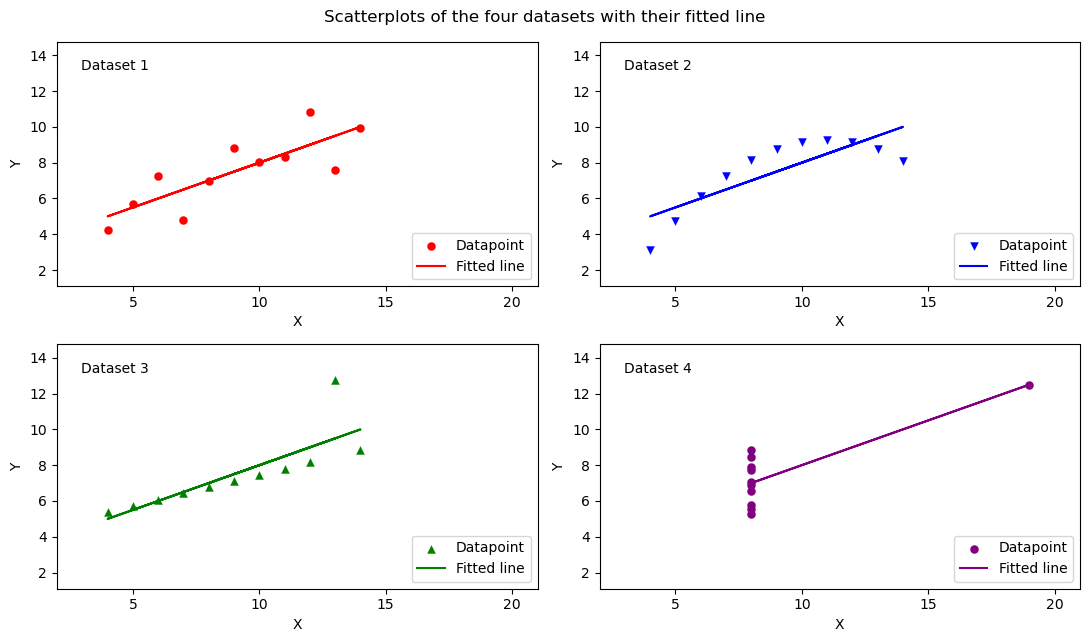

In [28]:
titles = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"]
markers = ["o", "v", "^", "o"]
colors = ["red", "blue", "green", "purple"]
labels = ['Datapoint', 'Datapoint', 'Datapoint', 'Datapoint']

x_min = min(min(data['x']) for data in df_lst)
x_max = max(max(data['x']) for data in df_lst)
y_min = min(min(data['y']) for data in df_lst)
y_max = max(max(data['y']) for data in df_lst)


fig = plt.figure(figsize = (11,6.5))

for i, data in enumerate(df_lst):

    #Creating a subplot spaceholder 
    ax = fig.add_subplot(2, 2, i+1)

    # Scatter plot
    plt.scatter(data['x'], data['y'], marker = markers[i], color = colors[i], linewidths=0.1, label = labels[i])

    # Regression line 
    a, b = np.polyfit(data['x'], data['y'], 1)
    plt.plot(data['x'], data['x']*a+b, color = colors[i], label = f"Fitted line")

    # Legend
    ax.legend(loc = 4)

    # Set subplots titles     
    ax.set_title(titles[i], x = 0.05, y=0.85,  loc = "left", fontsize =10) # set indentation 'left' and x, y added/subtracted, compared to the default values
    
    # Set x,y axes numbering
    plt.xticks(np.arange(0, x_max+2, 5))
    plt.yticks(np.arange(0, y_max+2, 2))

    # Set x and y limits 
    ax.set_xlim(x_min-2, x_max+2)
    ax.set_ylim(y_min-2, y_max+2)

    # Set x and y labels 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Make space between the different rows of plots 
    plt.subplots_adjust(hspace = 0.2, wspace = 0.2) 

    # set the inner margins between plot values and plot
    plt.margins(y = 0.55, x = 0.05) 

    fig.suptitle('Scatterplots of the four datasets with their fitted line')

    fig.tight_layout()

**Comment: The point of the exercise is to show that even if all the numbers indicate that this is the SAME dataset. When we visualize the datapoints, we quickly see that the datasets are NOT the same. Actually they differ quite significantly from each other. Therefore, it is not enough to just look at the statistical measures to identify and explain datasets but we must also use qualitative visualization techniques.**

## Part 2: Visualizing patterns in the data

In [29]:
df = pd.read_csv('crime.csv') # load the csv data into pandas dataframe  

In [30]:
# Add a year column based on the Date column 
df['Year'] = df.Date.apply(lambda date : date.split("/")[2])

In [31]:
# Drop observations for year 2018 due to missing data
year_index = df[df.Year == "2018"].index
df.drop(year_index, inplace = True)

In [32]:
# Focuscrimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

### Week - day plots

In [33]:
# Add a day column 
Day = pd.to_datetime(df.Date).dt.day_name() 

# Grouping by focus crime - day and reindexing from monday to Sunday
days = list(calendar.day_name)
group_day = df[df.Category.isin(focuscrimes)].groupby([ Day, 'Category']).size().unstack().reindex(days)

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/1624187182.py:1

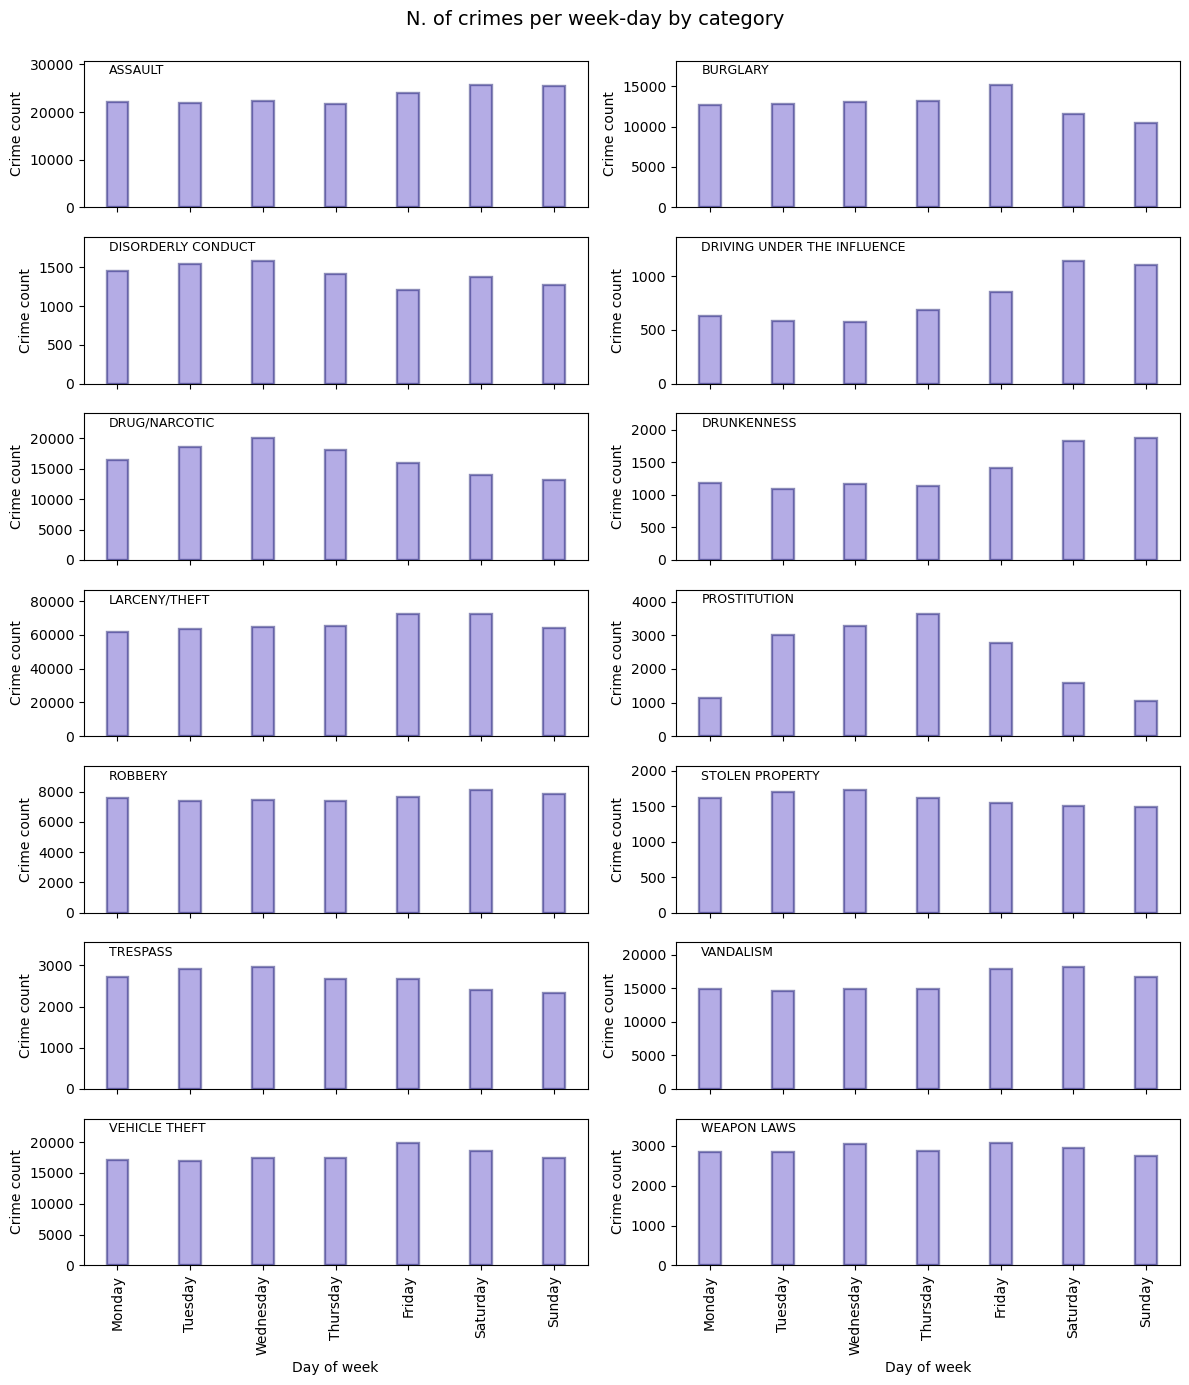

In [34]:
fig = plt.figure(figsize = (12, 15))

for i, crime in enumerate(group_day):

    # Creating a subplot spaceholder
    ax = fig.add_subplot(7, 2, i+1)

    # Plot values and attributes 
    plt.bar(group_day.index, group_day[crime],width=0.3, color = 'slateblue', alpha = 0.5, edgecolor = "midnightblue", linewidth = 1.7)

    # Set subplots titles     
    ax.set_title(group_day.columns[i], x = 0.05, y = 0.85, loc = 'left', fontsize = 9)  # set indentation 'left' and x, y added/subtracted, compared to the default values

    # X-axis ticks
    if i < (len(focuscrimes)-2):   # If the plot is not on the last row, don't show its x-axis ticks
        ax.set_xticklabels(' ')

    # X-axis labels
    if i >= (len(focuscrimes)-2):  # If plot is not on the last row, don't show its x-axis label
        plt.xlabel('Day of week')
    
    # Rotation of x-axis ticks
    plt.xticks(rotation = 90)   

    # Y-axis labels
    ax.set_ylabel('Crime count')

    # Set y limits 
    ax.set_ylim(0, group_day[crime].max()*1.2)
    
    fig.suptitle('N. of crimes per week-day by category', y = 0.95, fontsize = 14)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

**Comment: This visualization shows that the most of the focus crimes do not vary a lot on day to day basis but. Yet, reveals trends such as increased prostitution in the middle of the week, increased vehicle theft on Fridays, and increased drunkenness on weekends. Interesting enough, more people are arrested for drunk driving on Saturdays (probably because of partying). Last but not least, those who get caught prefer to use drugs during the week rather than on the weekends.**

### Months plot

In [35]:
# Add a month column
Month = pd.to_datetime(df.Date).dt.month_name()

# Grouping by focus crime - day and reindexing from Jnuary to December
months = list(calendar.month_name)
group_month = df[df.Category.isin(focuscrimes)].groupby([Month,'Category']).size().unstack().reindex(months)

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/411485616.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/411485616.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/411485616.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/411485616.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/411485616.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/411485616.py:16: Use

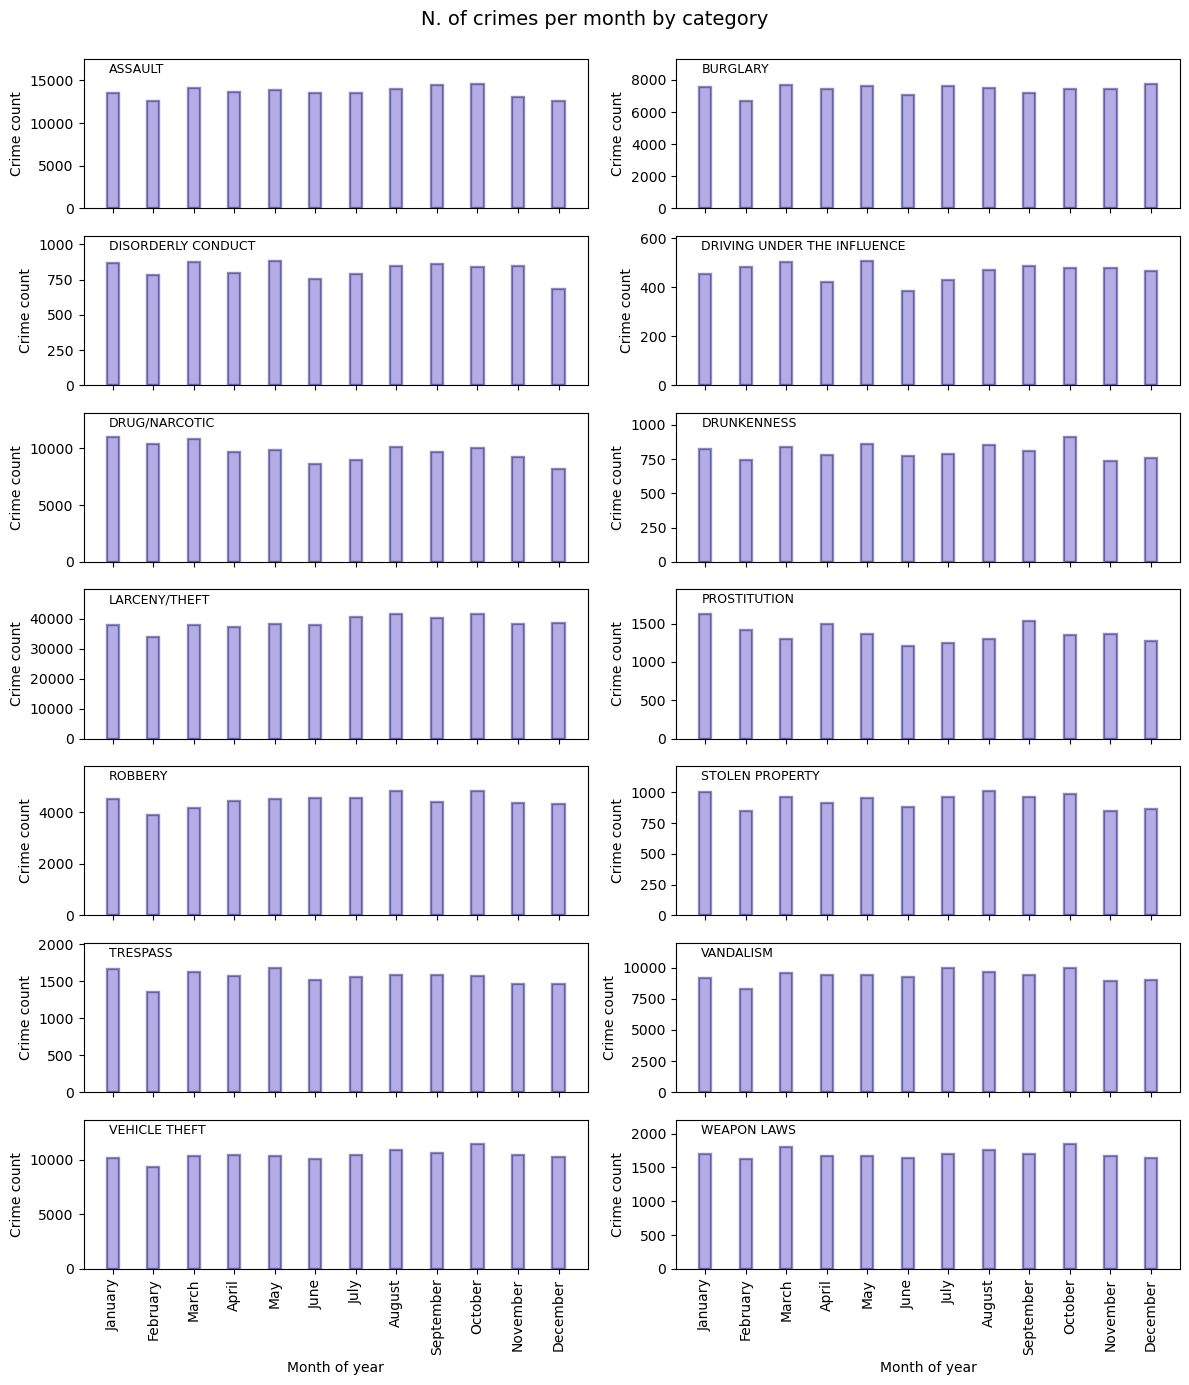

In [36]:
fig = plt.figure(figsize = (12, 15))
# Plot Title

for i, crime in enumerate(group_day):
    #Creating a subplot spaceholder 
    ax = fig.add_subplot(7, 2, i+1)

    # Plot values and attributes 
    plt.bar(group_month.index, group_month[crime],width=0.3, color = 'slateblue', alpha = 0.5, edgecolor = "midnightblue", linewidth = 1.7)

    # Set subplots titles     
    ax.set_title(group_month.columns[i], x = 0.05, y = 0.85, loc = 'left', fontsize = 9)  # set indentation 'left' and x, y added/subtracted, compared to the default values

    # X-axis ticks
    if i < (len(focuscrimes)-2):   # If the plot is not on the last row, don't show its x-axis ticks
        ax.set_xticklabels(' ')

    # X-axis labels
    if i >= (len(focuscrimes)-2):  # If plot is not on the last row, don't show its x-axis label
        plt.xlabel('Month of year')

    # Y-axis labels
    ax.set_ylabel('Crime count')

    # Rotation of x-axis ticks
    plt.xticks(rotation = 90)    
    
    # Set y limits 
    ax.set_ylim(0, group_month[crime].max()*1.2)

    fig.suptitle('N. of crimes per month by category', y = 0.95, fontsize = 14)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

**Comment: There aren't any major surprises in any of the months. However, a general pattern suggests that there are more crimes in January than February with the exception of Driving Under Influence. I suppose that just like everyone else, criminals make commitments for the new year but fail to keep them :P.** 

### The 23 hour cycle

In [37]:
# Create a Hour interval column based on Time column
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
labels = ['0:00 - 1:00 AM', '1:00 - 2:00 AM', '2:00 - 3:00 AM', '3:00 - 4:00 AM', '4:00 - 5:00 AM', '5:00 - 6:00 AM',
         '6:00 - 7:00 AM', '7:00 - 8:00 AM', '8:00 - 9:00 AM', '9:00 - 10:00 AM', '10:00 - 11:00 AM', '11:00 - 12:00 PM',
         '12:00 - 1:00 PM', '1:00 - 2:00 PM', '2:00 - 3:00 PM', '3:00 - 4:00 PM', '4:00 - 5:00 PM', '5:00 - 6:00 PM',
         '6:00 - 7:00 PM', '7:00 - 8:00 PM', '8:00 - 9:00 PM', '9:00 - 10:00 PM', '10:00 - 11:00 PM', '11:00 - 12:00 AM']
Hour_Interval = pd.cut(pd.to_datetime(df['Time'], format = '%H:%M').dt.hour, bins=bins, labels=labels, right=False)

# Grouping by focus crime - daily hour interval and reindexing from 00:00 
group_hour = df[df.Category.isin(focuscrimes)].groupby([Hour_Interval, 'Category']).size().unstack().reindex(labels)

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3743668802.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3743668802.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3743668802.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3743668802.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3743668802.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3743668802.py:1

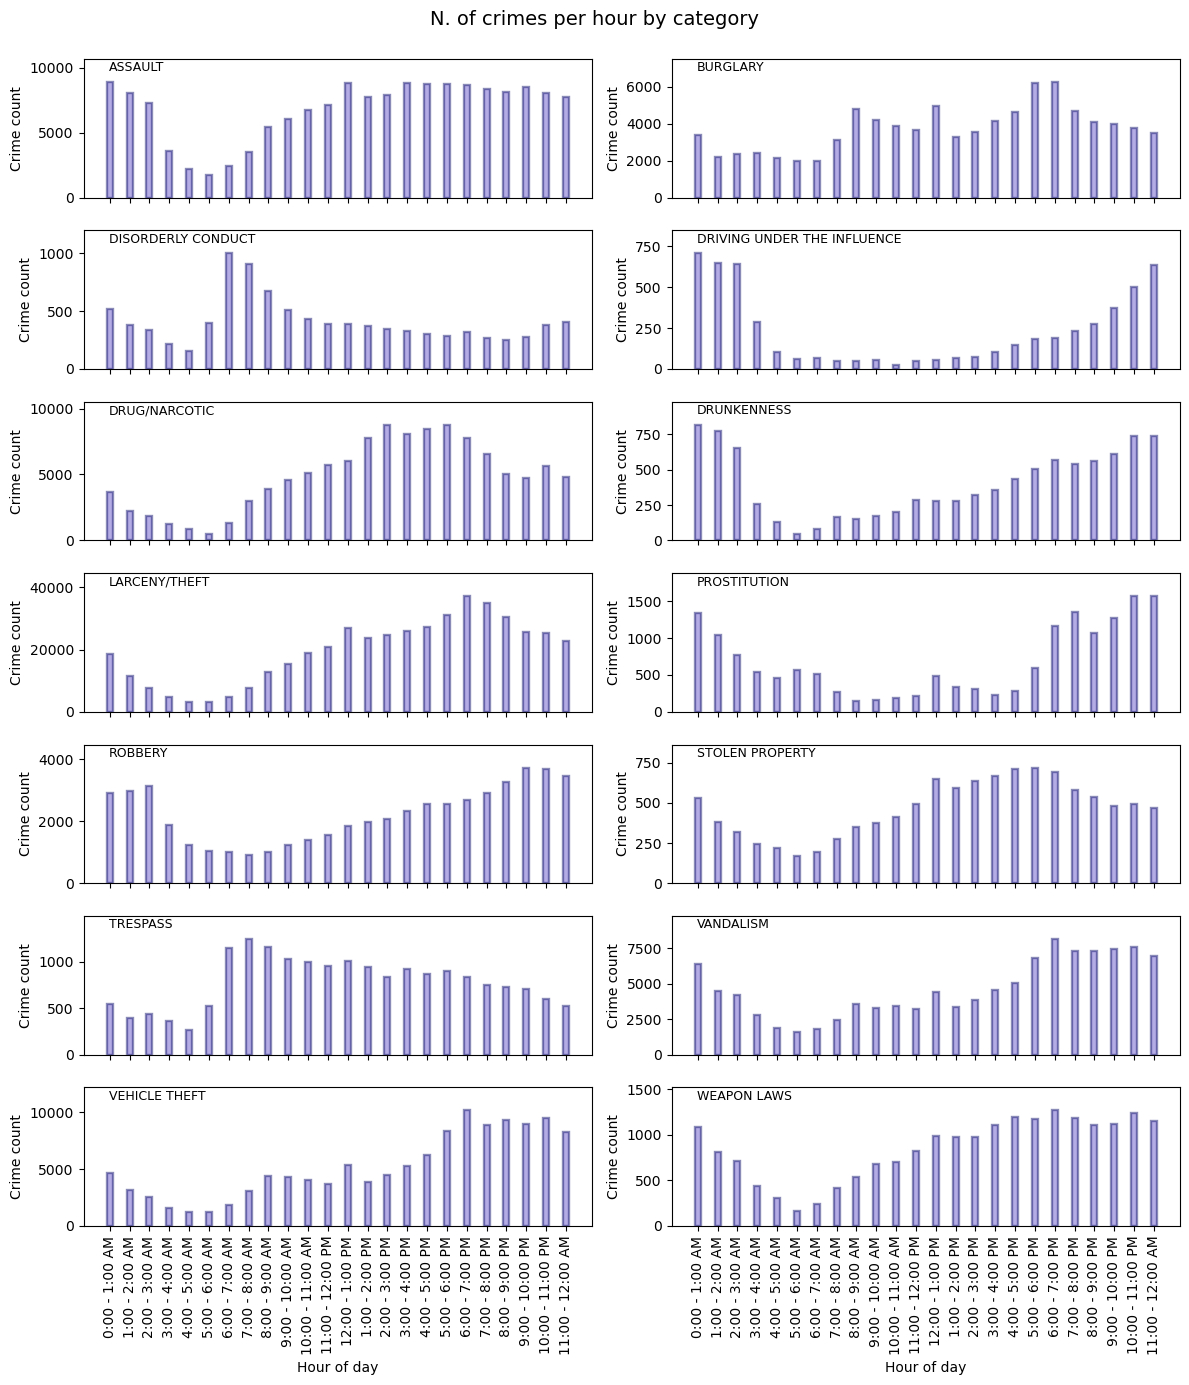

In [38]:
fig = plt.figure(figsize = (12, 15))
# Plot Title

for i, crime in enumerate(group_hour):
    #Creating a subplot spaceholder 
    ax = fig.add_subplot(7, 2, i+1)

    # Plot values and attributes 
    plt.bar(group_hour.index, group_hour[crime],width=0.3, color = 'slateblue', alpha = 0.5, edgecolor = "midnightblue", linewidth = 1.7)

    # Set subplots titles     
    ax.set_title(group_hour.columns[i], x = 0.05, y = 0.85, loc = 'left', fontsize = 9)  # set indentation 'left' and x, y added/subtracted, compared to the default values

    # X-axis ticks
    if i < (len(focuscrimes)-2):   # If the plot is not on the last row, don't show its x-axis ticks
        ax.set_xticklabels(' ')
    
    # Rotation of x-axis ticks
    plt.xticks(rotation = 90)  

    # X-axis labels
    if i >= (len(focuscrimes)-2):  # If plot is not on the last row, don't show its x-axis label
        plt.xlabel('Hour of day')

    # Y-axis labels
    ax.set_ylabel('Crime count') 
    
    # Set y limits 
    ax.set_ylim(0, group_hour[crime].max()*1.2)

    fig.suptitle('N. of crimes per hour by category', y = 0.95, fontsize = 14)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

**Comment: While the most crimes tend to decline from 3 am to 8 pm burglary happens continuously all the night.Assault and robbery charges also occur in the early hours of the morning ( 10 pm - 3 am).Additionally, we can observe that drunkenness and driving under influence are most common directly afterward parties (0 - 3 am). Last but not least, disorderly behavior is most noticeable very early in the day, around 6 am.**

### Hours of the week plot

In [39]:
hour_of_week = df['Time'].apply(lambda x: int(x.split(':')[0])) + pd.to_datetime(df.Date).dt.day_of_week  * 24
group_hour_of_week = df[df.Category.isin(focuscrimes)].groupby([hour_of_week, 'Category']).size().unstack()

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/1490894352.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')


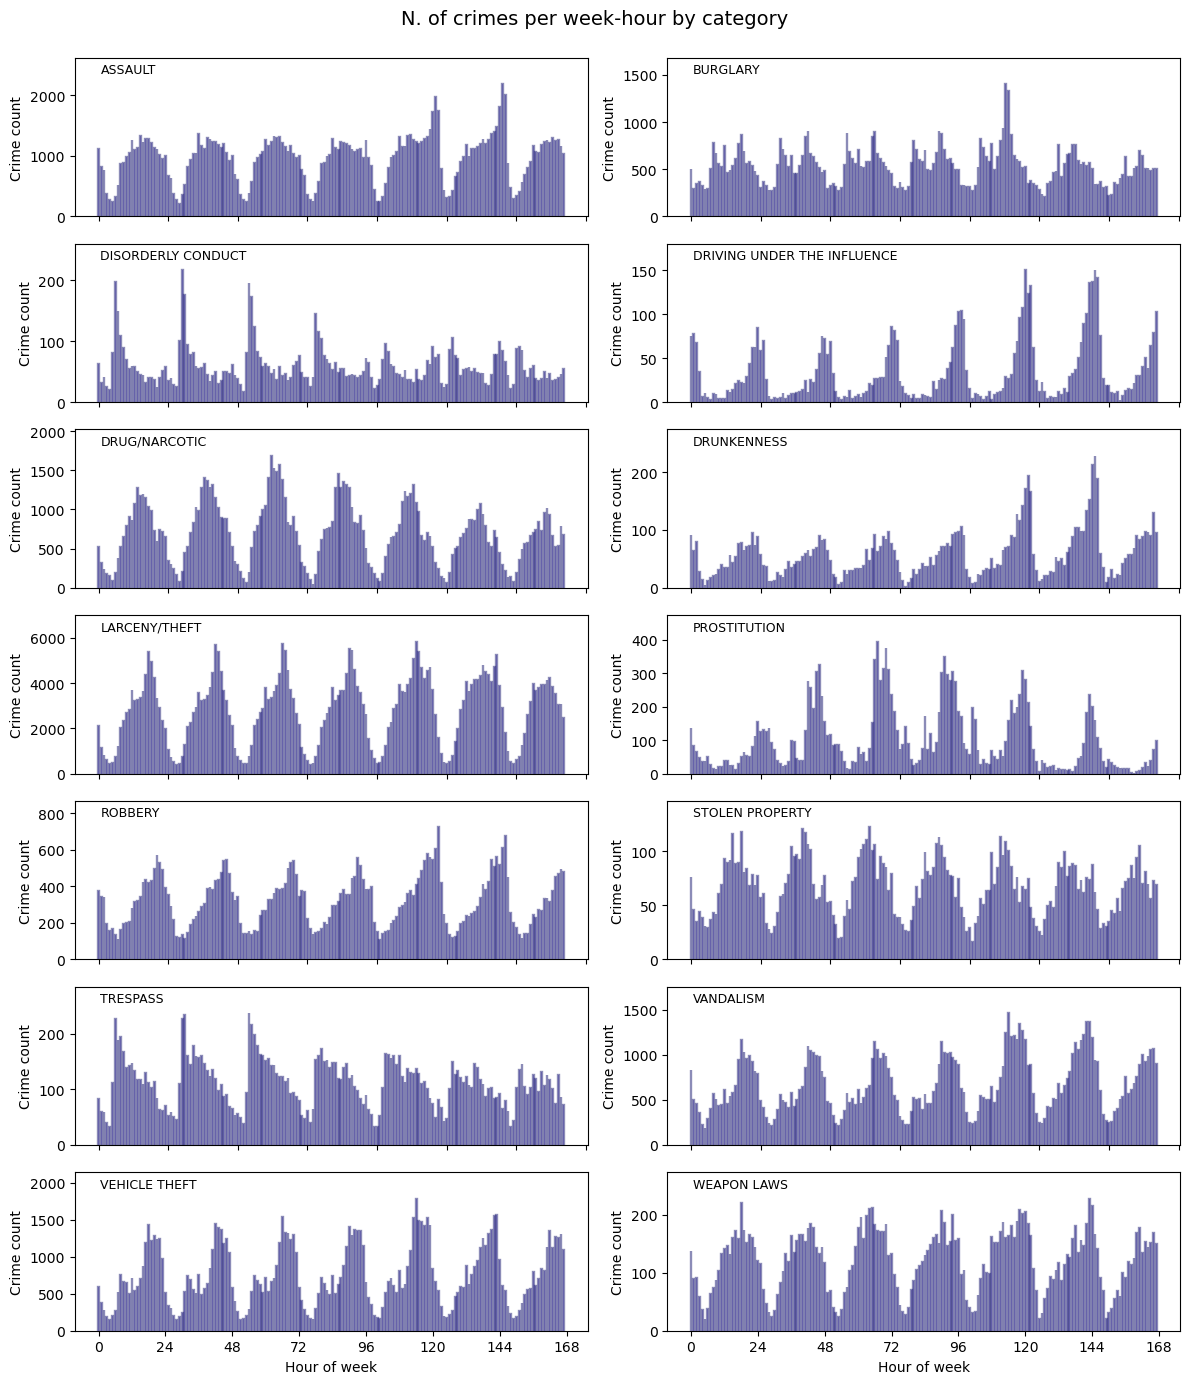

In [40]:
fig = plt.figure(figsize = (12, 15))
# Plot Title

for i, crime in enumerate(group_hour_of_week):
    #Creating a subplot spaceholder 
    ax = fig.add_subplot(7, 2, i+1)

    # Plot values and attributes 
    plt.bar(group_hour_of_week.index, group_hour_of_week[crime],width=0.3, color = 'slateblue', alpha = 0.5, edgecolor = "midnightblue", linewidth = 1.7)

    # Set subplots titles     
    ax.set_title(group_hour_of_week.columns[i], x = 0.05, y = 0.85, loc = 'left', fontsize = 9)  # set indentation 'left' and x, y added/subtracted, compared to the default values

    # X-axis ticks
    if i < (len(focuscrimes)-2):   # If the plot is not on the last row, don't show its x-axis ticks
        ax.set_xticklabels(' ')
    else:
        plt.xticks(ticks=range(0, len(group_hour_of_week)+1, 24))

    # X-axis labels
    if i >= (len(focuscrimes)-2):  # If plot is not on the last row, don't show its x-axis label
        plt.xlabel('Hour of week')

    # Y-axis labels
    ax.set_ylabel('Crime count')
    
    # Set y limits 
    ax.set_ylim(0, group_hour_of_week[crime].max() * 1.2)

    fig.suptitle('N. of crimes per week-hour by category', y = 0.95, fontsize = 14)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

**Comment: The above plot provides a better understanding of the data even though it is essentially a higher resolution of the weekly pattern. It is evident that larceny/theft occur more frequently than the other crimes. Most disruptive behavior occurs in the mornings of the first three days of the week. Driving under the influence and drunk driving may be related. Assaults also rise on Friday and Saturday nights during the evening hours. Additionally, it is now evident that burglaries are occurring late in the day on Fridays, which was something we already knew about. Last but not least, robbery is the crime that appears to be most evenly distributed throughout the week and has a consistent daily pattern.**

## Part 3: Exploring other types of plots for temporal data

### Calendar plot

Text(0.5, 1.02, 'Assault occurences throughout the years')

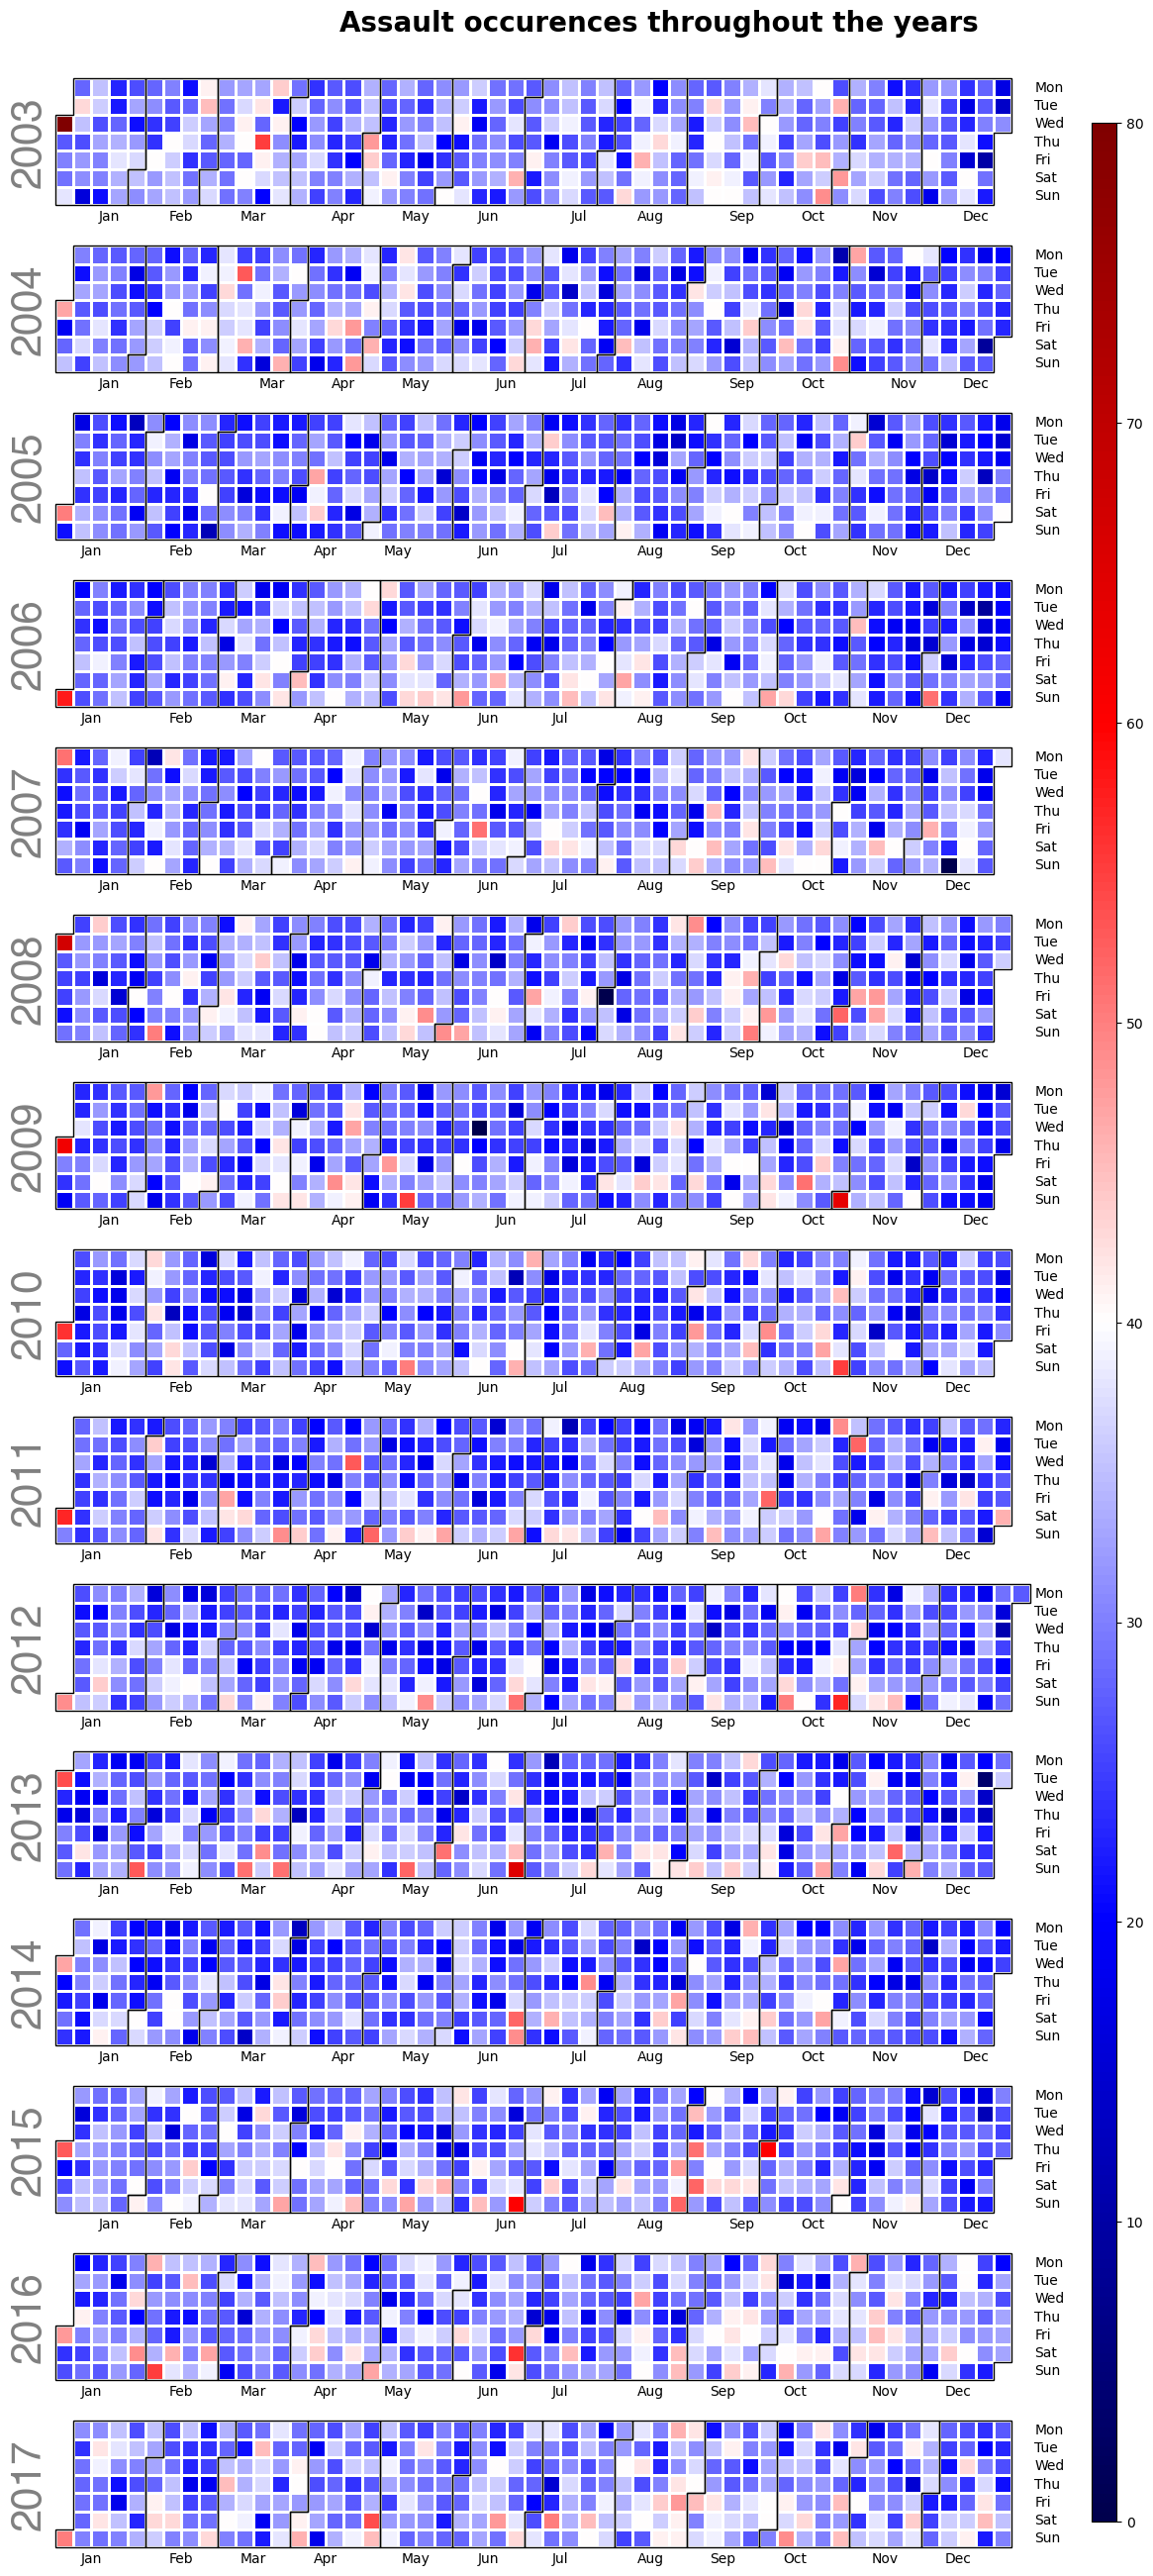

In [41]:
# Filter for Assault crimes from 2003 to 2017
data_assault = df[df['Category'] == 'ASSAULT']
data_assault = pd.to_datetime(data_assault['Date']).value_counts()

# Calendar plot of Assault crimes using calplot
title = 'Assault occurences throughout the years'
calplot.calplot(data_assault, cmap='seismic', colorbar=True, suptitle=title, edgecolor='black')
plt.suptitle(title, weight="bold", fontsize=20, y=1.02)

**Comments:** 
 * The calender plot is a type of visualization where we can look at many dimensions at the same time. We have a total of four dimensions; day of the week, month and year as well as number of occurences displayed as color.
 * There are a few intersting patterns that we can spot from the calendar plot, but in general we would argue that this type of visualization tries to pack too much information into one visualization, making it dificult for the human eye to read and make comparisons across the dimensions.
 * One interesting observation though, is the 1st of January of every year with many assaults compared to the 31st of December with less assaults. We would imagine to find a similar observation for other important party celebrations during the year. Comparing New Years Day with eg. San Francisco Carnaval (last weekend in May) and Independence Day (4th of July), we can see that these events do not have high assault occurences. However, when comparing to San Francisco Pride (last weekend in June), we see a spike in assault occurences every year, just like for New Years Day. This shows a tendency of more violence around certain celebrations.

### Polar bar chart

In [42]:
#Create Hour colummn
df['Hour'] = df['Time'].apply(lambda time: time.split(":")[0])

# Filter for Disorderly Conduct crimes and prepare data for polar bar chart
df_dis = df[df.Category == "DISORDERLY CONDUCT"]
df_dis = df_dis.groupby(['Hour']).size().reset_index(name='counts')
# df_dis = df_dis.sort_values(by=['Time'])
df_dis['Hour'] = df_dis["Hour"].apply(str)
df_dis = df_dis.reset_index(drop=True)

# Polar bar chart using plotly.graph_objects
fig = go.Figure(data=[go.Barpolar(
    r=df_dis['counts'],
    theta=df_dis['Hour'],
    marker_color= "#B30000",
    marker_line_color='black',
    marker_line_width=1,
    opacity=0.8
)])
fig.update_layout(
    title={
        'text': "Number of disorderly conduct crimes for each hour of the day",
        'x': 0.5,
        'y': 0.95
    },
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1050]
        ),
        angularaxis=dict(
            rotation=90,
            direction="clockwise",
            tickmode="array",
            tickvals=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
            ticktext=["12 am", "1 am", "2 am", "3 am", "4 am", "5 am", "6 am", "7 am", "8 am", "9 am", "10 am", "11 am", "12 pm", "1 pm", "2 pm", "3 pm", "4 pm", "5 pm", "6 pm", "7 pm", "8 pm", "9 pm", "10 pm", "11 pm"]
        )
    ),
    showlegend=False,
    height=800,
    width=1000
)

**Comments**
* The polar bar chart for disorderly conduct crimes shows us in an insightful way the development over the 24 hours of the day. By sorting from the top and rotating clockwise, we use the hour dimension to wrap around itself as a clock, making the visualization easy to follow.

* Although polar bar charts are a cool looking and different visualization type, we would argue that a simple bar chart is a better solution for visualizing crimes over the hours of the day. This is because it is easier for the human eye to compare sizes on the bar chart compared to the polar bar chart. E.g. it is hard to visually compare midnight with 9 am. However, that is one of the advantages of plotly visualization, compared to matplotlib or seaborn, as it gives us an interactive tooltip where you can hover over the visualization and get insight on the data. Furthermore, the polar bar chart requires much more data preparation and code to create, compared to the bar chart, which is much quicker and simpler to create.

### Time Series 

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3145037858.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3145037858.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3145037858.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3145037858.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3145037858.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_74515/3145037858.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/h6/f8twklt56rdg96n68wjjppdm

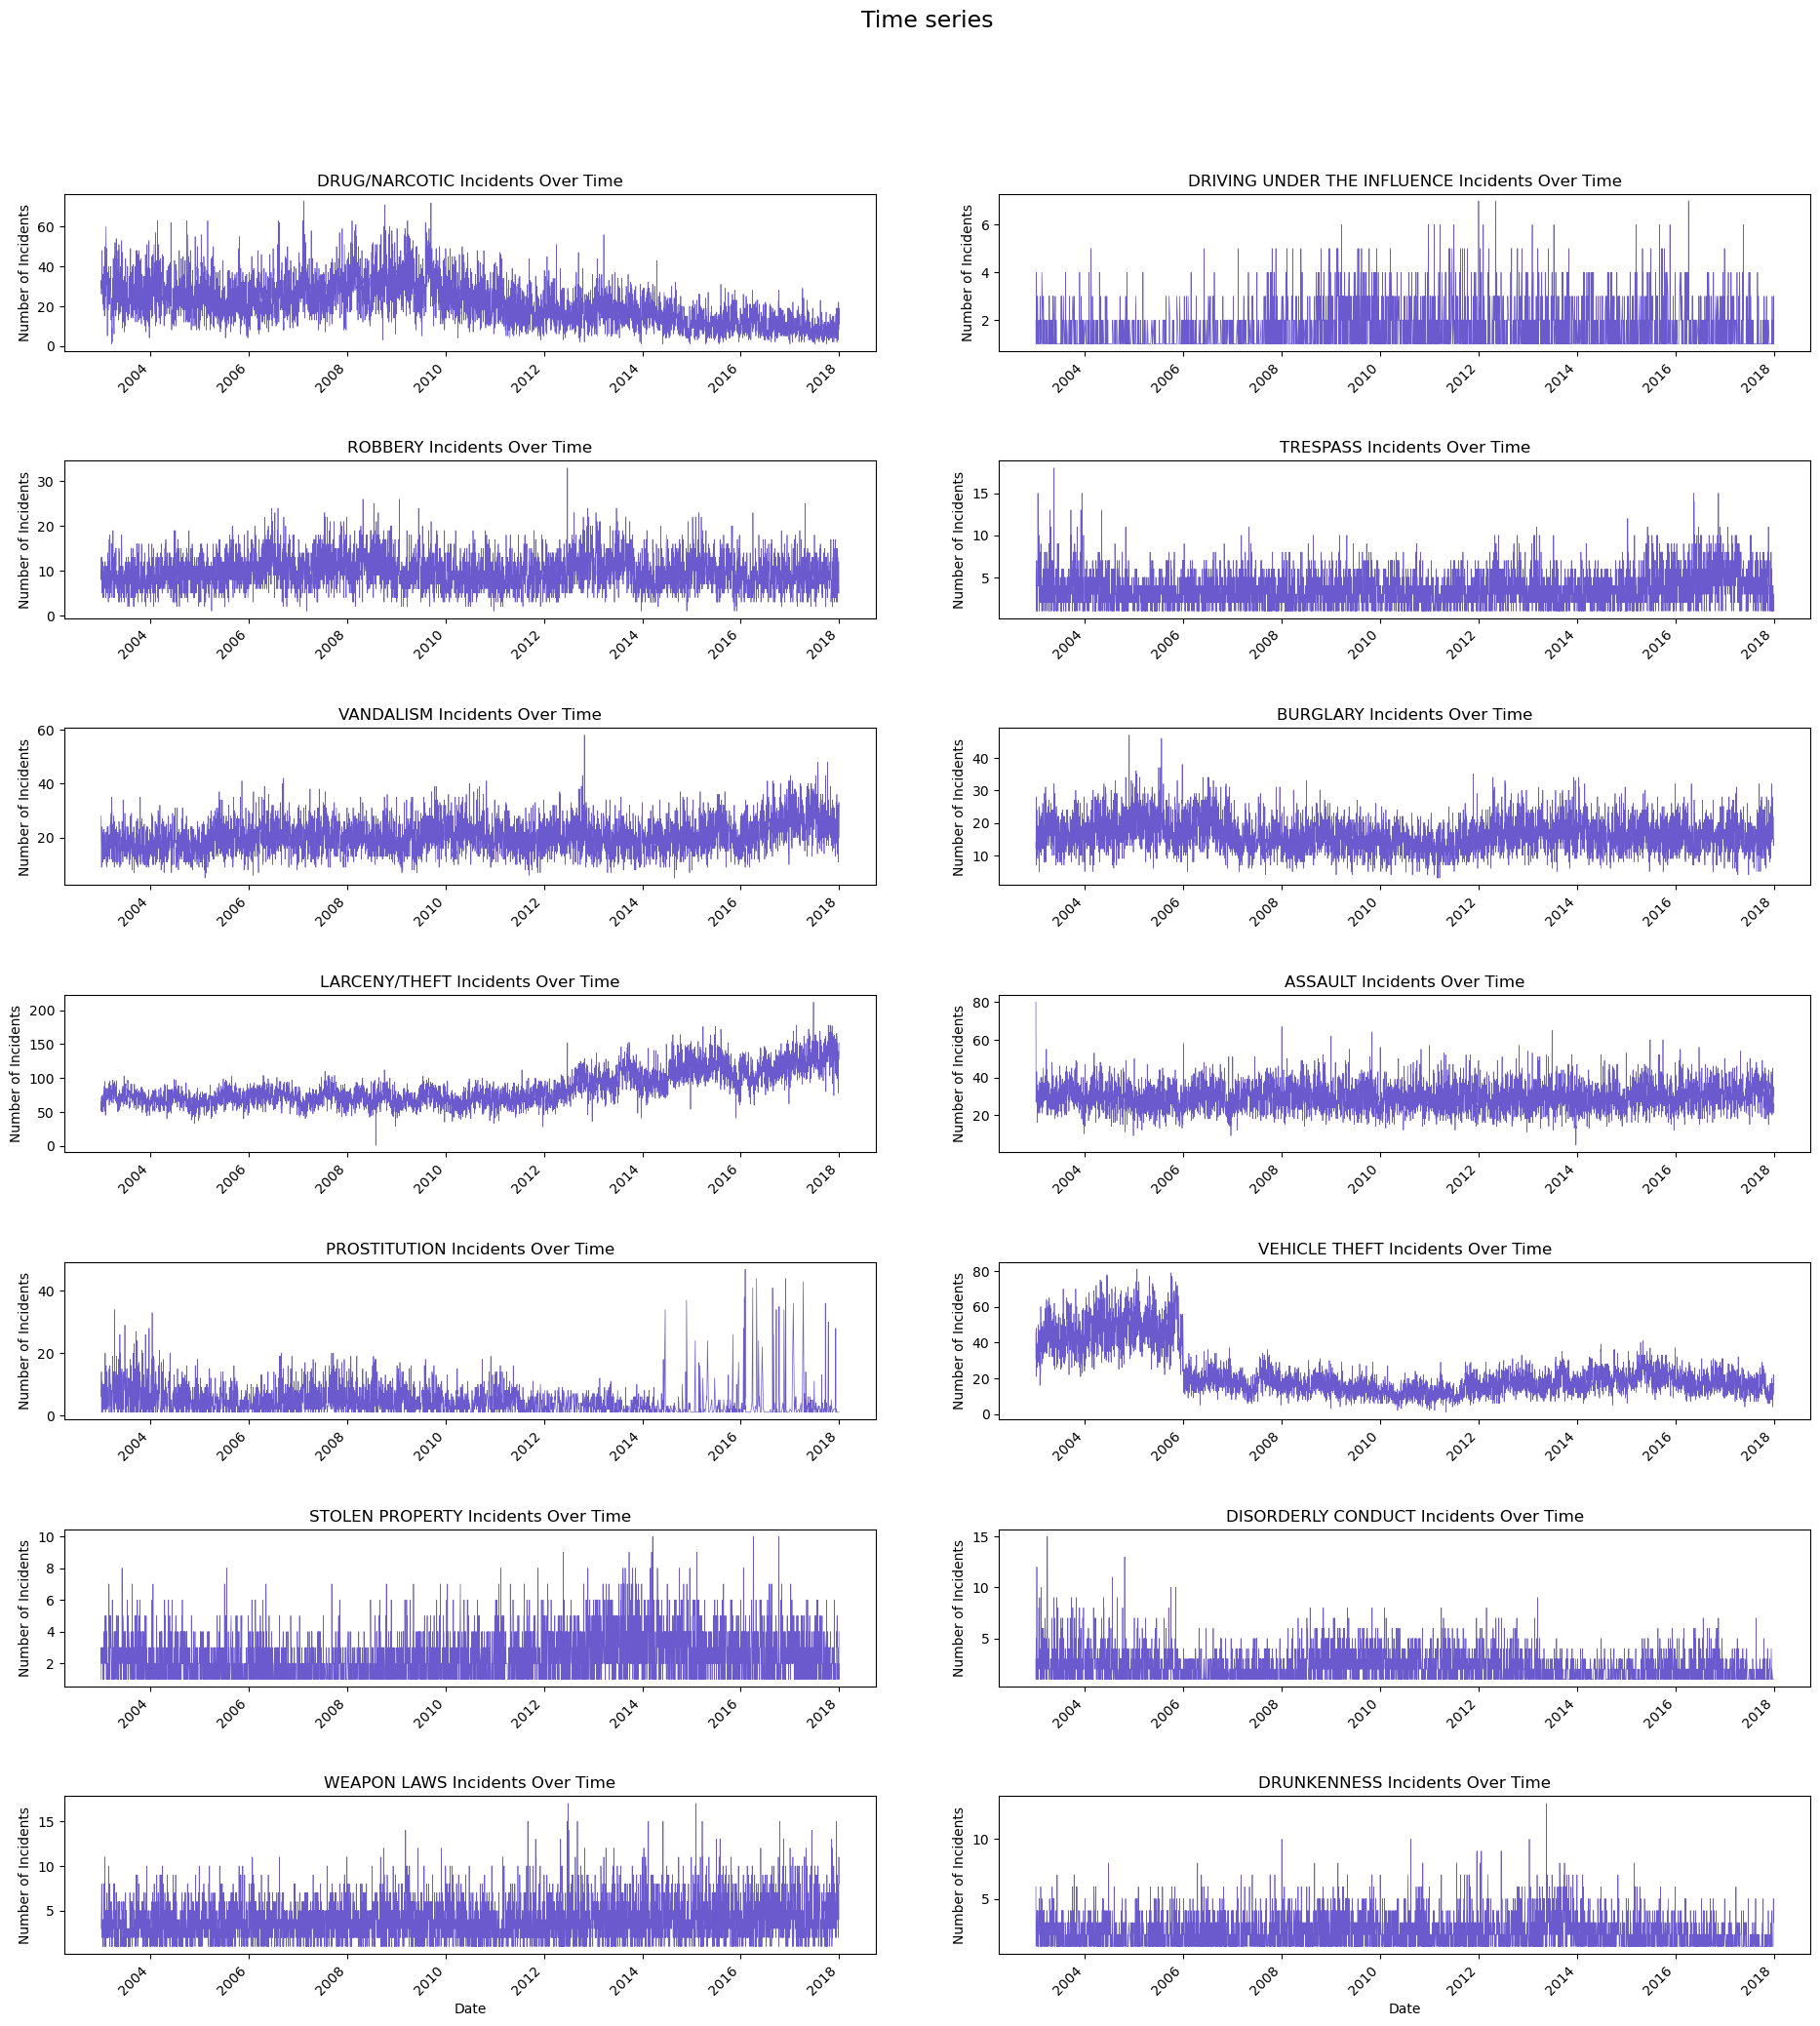

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

# Define the grid dimensions
n_rows = 7
n_cols = 2

# Create a grid of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
fig.tight_layout(pad=6.0)

# Loop through the focuscrimes and plot the data
for index, crime in enumerate(focuscrimes):
    row = index // n_cols
    col = index % n_cols
    
    data_crime = df[df['Category'] == crime]
    data_crime = pd.to_datetime(data_crime['Date']).value_counts().sort_index()
    
    # Plot values and attributes 
    axs[row, col].plot(data_crime, linewidth=0.5, color='slateblue')

    # Set subplots titles  
    axs[row, col].set_title(f'{crime} Incidents Over Time')

    # X-axis labels
    if index >= (len(focuscrimes)-2):  # If plot is not on the last row, don't show its x-axis label
        axs[row, col].set_xlabel('Date')
    
    # Rotate x-tick labels by 45 degrees
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45, ha='right')

    # Y-axis labels
    axs[row, col].set_ylabel('Number of Incidents')

# Set the overall title for the figure
fig.suptitle('Time series', y=1.05, fontsize=17)

# Show the figure with all subplots
plt.show()